# ANALYSIS OF AIRCRASH 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import streamlit as st


In [2]:
# import csv file
df = pd.read_csv(r"C:\Users\DELL\Documents\hiit data analysis\python\Data_apps\Project\aircrahesFullDataUpdated_2024 (1).csv")

In [3]:
df

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...
5030,1980,Qtr 3,September,17,Zaire,De Havilland,de Havilland DHC 5 Buffalo9T,Near Kindu Zaire,Force Air Zairean - Military,0,36,36
5031,1997,Qtr 3,September,12,Zaire,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 3009Q,Near Uvira Zaire,Commuter Air TMK,0,22,22
5032,1984,Qtr 3,September,11,Zaire,Handley Page Dart Herald,Handley Page Dart Herald 2029Q CAH,Near the Kwango River Zaire,Services Aero MMM,0,30,30
5033,1980,Qtr 3,September,14,Zaire,Lockheed Hercules,Lockheed Hercules C 1309T,Kindu Zaire,Zaïroise Aérienne Force - Military,0,36,36


# DATA CLEANING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5035 non-null   int64 
 1   Quarter                5035 non-null   object
 2   Month                  5035 non-null   object
 3   Day                    5035 non-null   int64 
 4   Country/Region         4805 non-null   object
 5   Aircraft Manufacturer  5035 non-null   object
 6   Aircraft               5035 non-null   object
 7   Location               5035 non-null   object
 8   Operator               4801 non-null   object
 9   Ground                 5035 non-null   int64 
 10  Fatalities (air)       5035 non-null   int64 
 11  Aboard                 5035 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 472.2+ KB


In [5]:
# checking for nan values
df.isnull().sum()


Year                       0
Quarter                    0
Month                      0
Day                        0
Country/Region           230
Aircraft Manufacturer      0
Aircraft                   0
Location                   0
Operator                 234
Ground                     0
Fatalities (air)           0
Aboard                     0
dtype: int64

In [6]:
# filling some unknown signs with nan value 
df['Country/Region'] = df['Country/Region'].replace('-', pd.NA)

# filling the nan values with unknown
df['Country/Region'] = df['Country/Region'].fillna('unknown')
df['Operator'] = df['Operator'].fillna('unknown')


In [7]:
# check for duplicate
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


In [8]:
# adding a new column for more graphs
df['Decade']=(df['Year']//10)*10

In [9]:
df

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,Decade
0,1970,Qtr 2,April,28,unknown,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11,1970
1,1952,Qtr 2,April,30,unknown,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9,1950
2,1973,Qtr 2,April,10,unknown,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145,1970
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24,2000
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12,1940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,1980,Qtr 3,September,17,Zaire,De Havilland,de Havilland DHC 5 Buffalo9T,Near Kindu Zaire,Force Air Zairean - Military,0,36,36,1980
5031,1997,Qtr 3,September,12,Zaire,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 3009Q,Near Uvira Zaire,Commuter Air TMK,0,22,22,1990
5032,1984,Qtr 3,September,11,Zaire,Handley Page Dart Herald,Handley Page Dart Herald 2029Q CAH,Near the Kwango River Zaire,Services Aero MMM,0,30,30,1980
5033,1980,Qtr 3,September,14,Zaire,Lockheed Hercules,Lockheed Hercules C 1309T,Kindu Zaire,Zaïroise Aérienne Force - Military,0,36,36,1980


In [10]:
#merging year day and month
df['Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str)

In [11]:
# drop year month and date columns
df.drop(['Year', 'Month', 'Day'],axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Quarter                5035 non-null   object
 1   Country/Region         5035 non-null   object
 2   Aircraft Manufacturer  5035 non-null   object
 3   Aircraft               5035 non-null   object
 4   Location               5035 non-null   object
 5   Operator               5035 non-null   object
 6   Ground                 5035 non-null   int64 
 7   Fatalities (air)       5035 non-null   int64 
 8   Aboard                 5035 non-null   int64 
 9   Decade                 5035 non-null   int64 
 10  Date                   5035 non-null   object
dtypes: int64(4), object(7)
memory usage: 432.8+ KB


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Quarter                5035 non-null   object
 1   Country/Region         5035 non-null   object
 2   Aircraft Manufacturer  5035 non-null   object
 3   Aircraft               5035 non-null   object
 4   Location               5035 non-null   object
 5   Operator               5035 non-null   object
 6   Ground                 5035 non-null   int64 
 7   Fatalities (air)       5035 non-null   int64 
 8   Aboard                 5035 non-null   int64 
 9   Decade                 5035 non-null   int64 
 10  Date                   5035 non-null   object
dtypes: int64(4), object(7)
memory usage: 432.8+ KB


In [14]:
df

,Quarter,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,Decade,Date
0,Qtr 2,unknown,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11,1970,1970-April-28
1,Qtr 2,unknown,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9,1950,1952-April-30
2,Qtr 2,unknown,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145,1970,1973-April-10
3,Qtr 2,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24,2000,2000-April-19
4,Qtr 2,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12,1940,1946-April-30
...,...,...,...,...,...,...,...,...,...,...,...
5030,Qtr 3,Zaire,De Havilland,de Havilland DHC 5 Buffalo9T,Near Kindu Zaire,Force Air Zairean - Military,0,36,36,1980,1980-September-17
5031,Qtr 3,Zaire,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 3009Q,Near Uvira Zaire,Commuter Air TMK,0,22,22,1990,1997-September-12
5032,Qtr 3,Zaire,Handley Page Dart Herald,Handley Page Dart Herald 2029Q CAH,Near the Kwango River Zaire,Services Aero MMM,0,30,30,1980,1984-September-11
5033,Qtr 3,Zaire,Lockheed Hercules,Lockheed Hercules C 1309T,Kindu Zaire,Zaïroise Aérienne Force - Military,0,36,36,1980,1980-September-14


## RESEARCH QUESTIONS

In [15]:
# Total Number of fatalities from 1900 till date 
df['Fatalities (air)'].sum()

np.int64(111872)

In [16]:
# Total number of Ground from 1900 till date  
df['Ground'].sum()

np.int64(8582)

In [17]:
# How have aircraft crash frequencies changed over time?
# Feature: A line chart showing the number of crashes per decades
# Importance: This provides a clear view of how the frequency of crashes has evolved over time, highlighting any trends or patterns.
decade_fatality = df.groupby('Decade')['Fatalities (air)'].sum().reset_index()

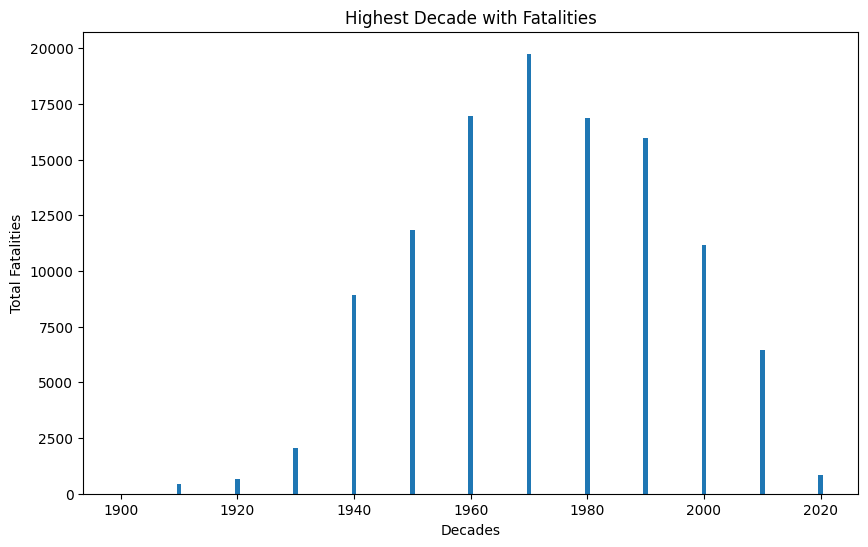

In [18]:
plt.figure(figsize=(10,6))
plt.bar(decade_fatality['Decade'],decade_fatality['Fatalities (air)'])
plt.xlabel('Decades')
plt.ylabel('Total Fatalities')
plt.title('Highest Decade with Fatalities')
plt.show()

In [19]:
# How have aircraft crash ground changed over time?
# Feature: A line chart showing the number of ground per decades
# Importance: This provides a clear view of how the frequency of crashes has evolved over time, highlighting any trends or patterns.
decade_Ground = df.groupby('Decade')['Ground'].sum().reset_index()

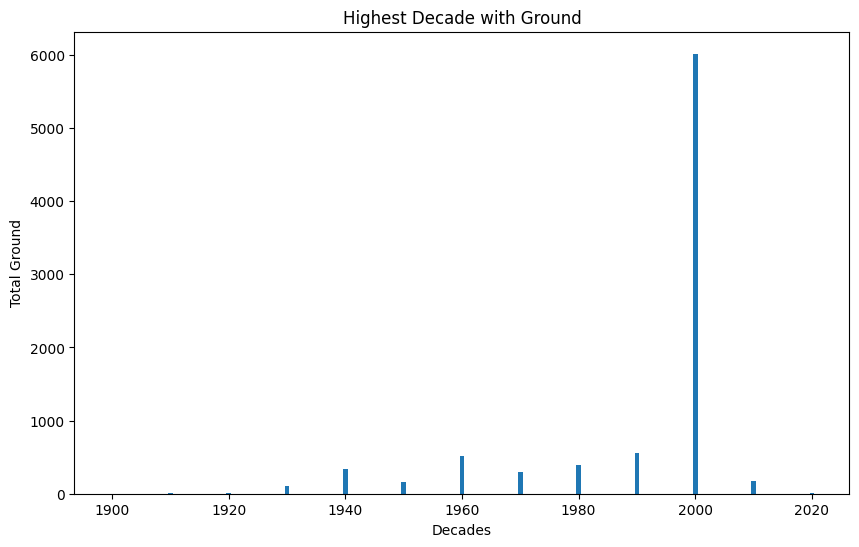

In [20]:
plt.figure(figsize=(10,6))
plt.bar(decade_Ground['Decade'],decade_Ground['Ground'])
plt.xlabel('Decades')
plt.ylabel('Total Ground')
plt.title('Highest Decade with Ground')
plt.show()

# EDA

In [21]:
df['Ground'].mean()


np.float64(1.7044687189672294)

In [22]:
df['Ground'].std()

np.float64(55.10511544676803)

In [23]:
df['Fatalities (air)'].mean()

np.float64(22.2188679245283)

In [24]:
df['Ground'].median()

np.float64(0.0)

In [25]:
df['Fatalities (air)'].median()

np.float64(11.0)

In [26]:
df['Fatalities (air)'].std()

np.float64(34.94892921772949)

In [27]:
# summary statistics
print(df.describe())

            Ground  Fatalities (air)       Aboard       Decade
count  5035.000000       5035.000000  5035.000000  5035.000000
mean      1.704469         22.218868    31.107249  1966.399206
std      55.105115         34.948929    45.740185    25.049088
min       0.000000          0.000000     0.000000  1900.000000
25%       0.000000          4.000000     7.000000  1950.000000
50%       0.000000         11.000000    16.000000  1970.000000
75%       0.000000         25.000000    34.500000  1990.000000
max    2750.000000        583.000000   644.000000  2020.000000


# CHARTS AND GRAPH

In [28]:
quarterly_fatality = df.groupby('Quarter')['Fatalities (air)'].sum()

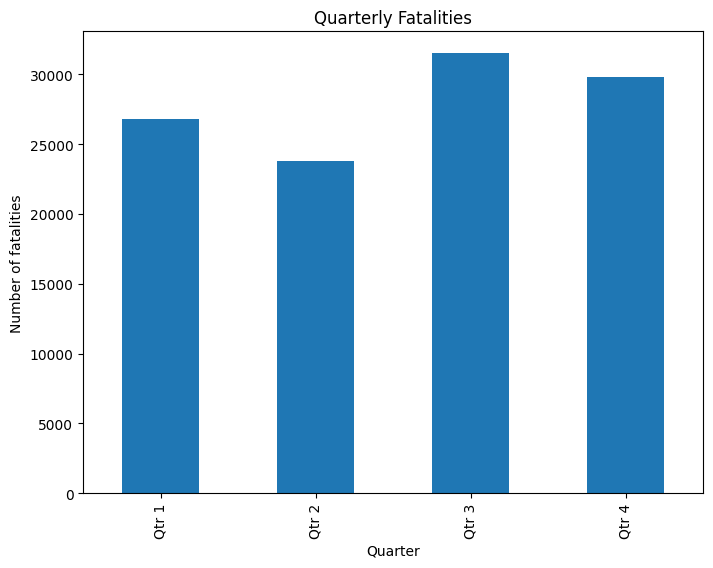

In [29]:
plt.figure(figsize=(8,6))
quarterly_fatality.plot(kind='bar')
plt.title('Quarterly Fatalities')
plt.xlabel('Quarter')
plt.ylabel('Number of fatalities')
plt.show()

In [30]:
quarterly_Aboard = df.groupby('Quarter')['Aboard'].sum()

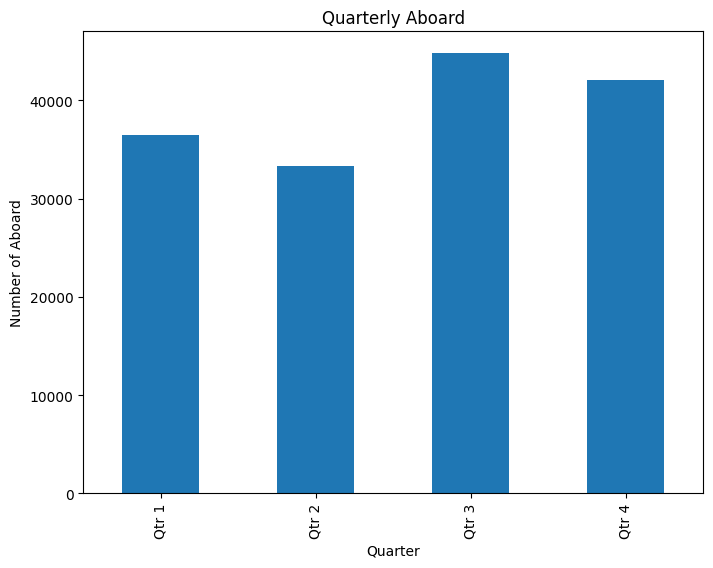

In [31]:
plt.figure(figsize=(8,6))
quarterly_Aboard.plot(kind='bar')
plt.title('Quarterly Aboard')
plt.xlabel('Quarter')
plt.ylabel('Number of Aboard')
plt.show()

# FINDINGS AND RECOMMENDATIONS

## FINDINGS 

1. Mechanical failure: engine or system malfunctions led to the crash.

2. There are more fatalities during the third quarter, could it be the weather or the number of people on board 

3. We have more grounds in 2000 decades.

## RECOMMENDATIONS

1. Enhance maintenance procedure: impliment more rigorous maintenance scheduke or procedures.

2. There should be a proper update weather forecasting during the third quarter, and also regulate the amount of people boarding an airplane 

3. what was done in the 2000 decade for having more survivors, it should be taken note of 